In [10]:
import os
from PIL import Image, ImageDraw, ImageFont
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from kneed import KneeLocator

os.chdir('C:/Users/Mark/Documents/colourExtract')

## potential todo: 
# add person recognition to do clothing

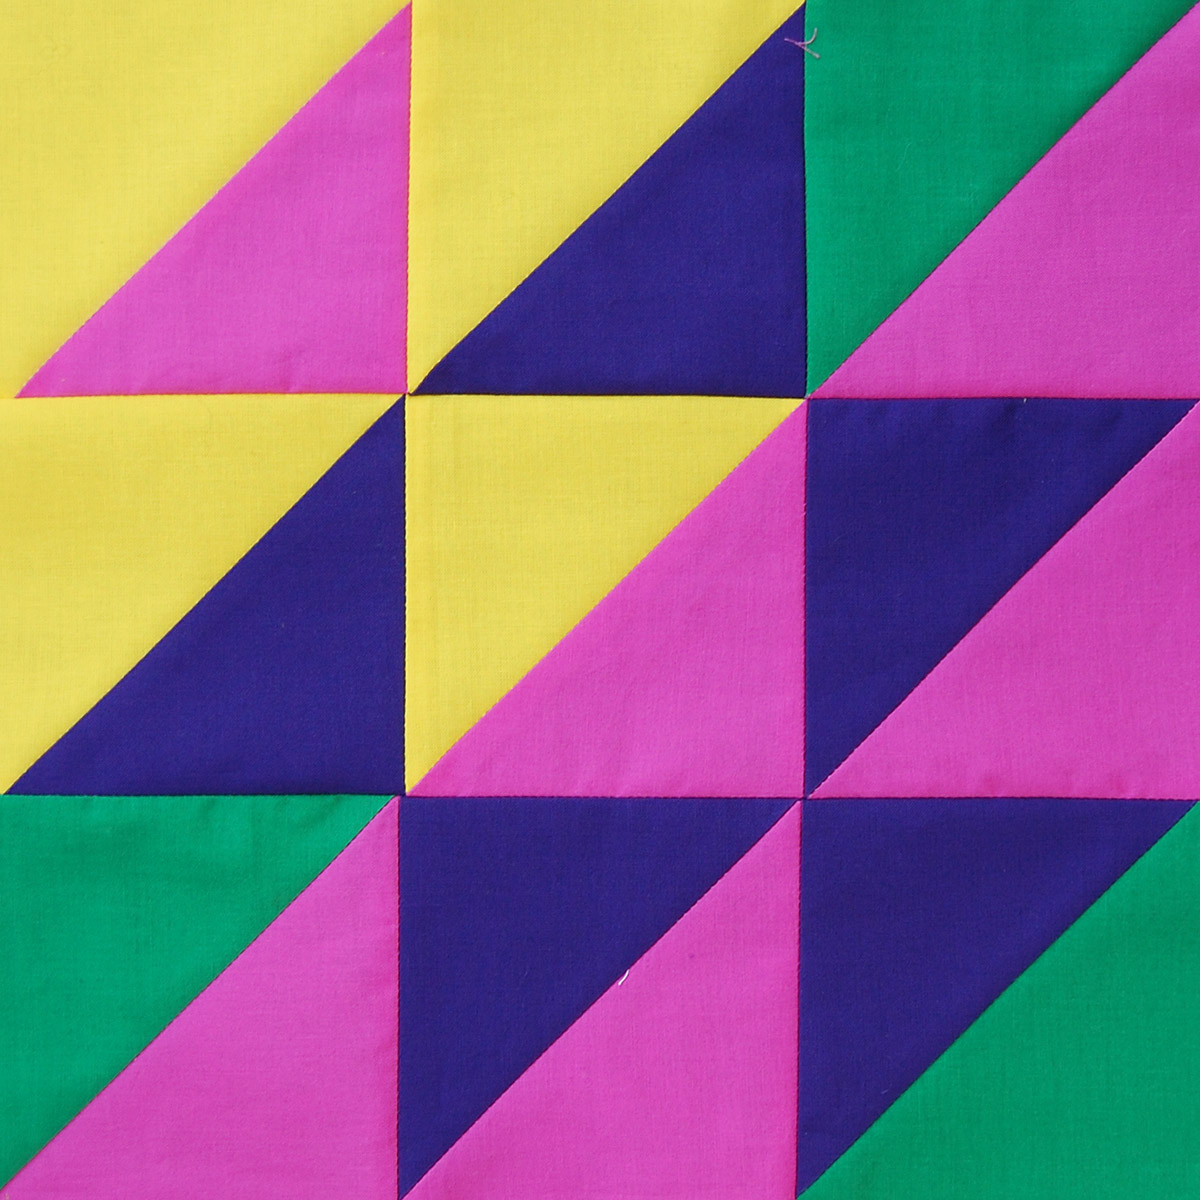

In [11]:
# Load image
img = Image.open("test_image2.jpg")

# Convert image to a numpy array
img_array = np.array(img)

# Flatten the image array from 2d to 1d array
img_array = img_array.reshape(-1, 3) 

img

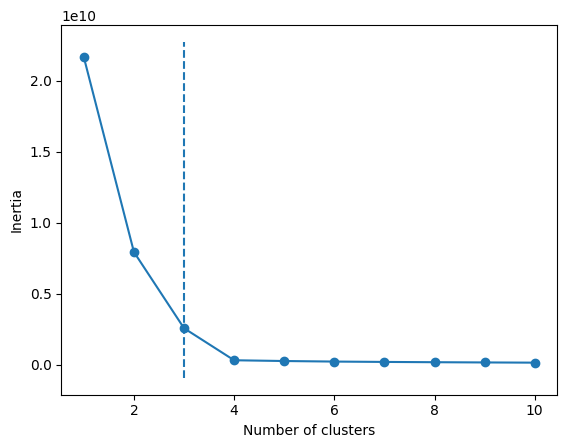

In [20]:
# Create a list to store the cost function for different numbers of clusters
inertias = []

# Calculate the cost function for different numbers of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10).fit(img_array)
    inertias.append(kmeans.inertia_)

# Plot the cost function
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Use the KneeLocator to find the elbow point
kl = KneeLocator(range(1, 11), inertias, S=1.0, curve='convex', direction='decreasing')

# Plot the elbow point on the graph
plt.vlines(kl.knee, plt.ylim()[0], plt.ylim()[1], linestyle='--')
plt.show()

# Store the optimal number of clusters
optimal_k = kl.knee

# get one additional cluster
choosen_k = optimal_k + 1


In [21]:
# Cluster the image array
kmeans = KMeans(n_clusters=choosen_k, n_init=10).fit(img_array)

# Extract the dominant colors
palette = kmeans.cluster_centers_.round().astype(int)

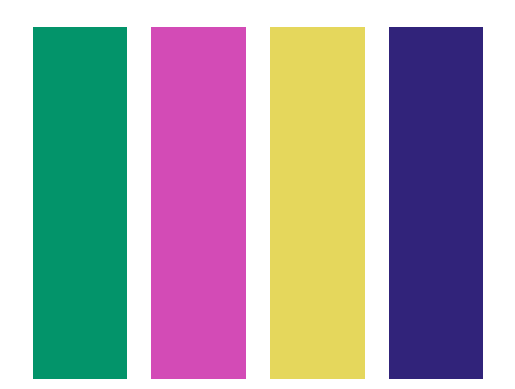

In [22]:
# Plot the color palette as a bar chart
plt.bar(range(palette.shape[0]), np.ones(palette.shape[0]), color=palette/255.0)
plt.axis('off')
plt.show()

In [15]:
# next: get it to give the values for the bars then create an automated way for creating this into a series of images ready to upload to instragram
def to_hex(rgb):
    return "#{:02x}{:02x}{:02x}".format(*rgb)

palette_hex = [to_hex(rgb) for rgb in palette]


C:\Users\Mark\AppData\Local\Temp\ipykernel_11488\1785483216.py:11: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax2.add_artist(plt.Circle((i, 0.5), radius=0.4, color=palette[i]/255.0, edgecolor='black', capstyle='round'))


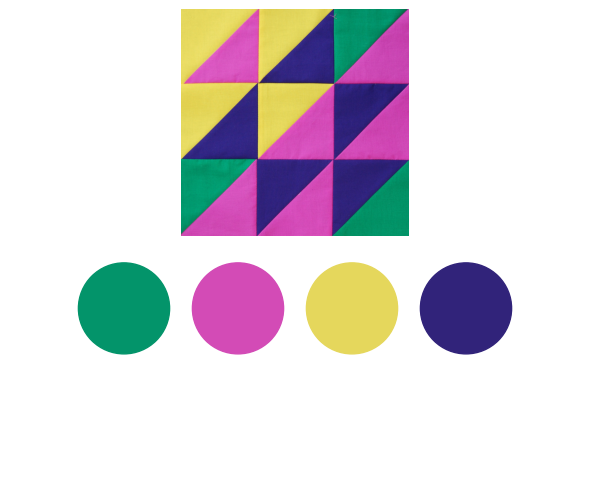

In [16]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 5))

# Plot the original image in the first subplot
ax1.imshow(img)
ax1.axis('off')

# Plot the color palette in the second subplot
N = palette.shape[0]
for i in range(N):
    ax2.add_artist(plt.Circle((i, 0.5), radius=0.4, color=palette[i]/255.0, edgecolor='black', capstyle='round'))
ax2.set_xlim([-1, N])
ax2.set_ylim([-1, 1])
ax2.axis('off')

plt.subplots_adjust(left=3, right=4, bottom=0, top=1, hspace=0, wspace=0)
plt.tight_layout()
plt.show()


In [17]:
# Create an image to store the palette
palette_img = Image.new("RGB", (1080, 1080), (255, 255, 255))

# Draw the original image in the top half of the palette image
palette_img.paste(img, ((palette_img.width - img.width)//2, 50))

# Draw the color palette in the bottom half of the palette image
N = palette.shape[0]
draw = ImageDraw.Draw(palette_img)
for i in range(N):
    x = 50 * (i + 1) + (palette_img.width - 50 * (N + 1)) / 2
    y = palette_img.height - 50
    r = 20
    color = tuple(palette[i].astype(int))
    draw.ellipse((x - r, y - r, x + r, y + r), fill=color)

# Show the palette image
palette_img.show()


In [18]:
# Create a new image with the desired size
img_size = (1080, 1080)
for i in range(N):
    color = tuple(palette[i].astype(int))
    colour_img = Image.new('RGB', img_size, color=color)
    
    # Write the hex code on top of the image
    draw = ImageDraw.Draw(colour_img)
    font = ImageFont.truetype('arial.ttf', 128)
    text = palette_hex[i]
    textwidth, textheight = draw.textsize(text, font)
    draw.text(((img_size[0]-textwidth)/2, (img_size[1]-textheight)/2), text, font=font, fill=(255,255,255))
    
    # Save the image
    colour_img.save(f'palette_{i+1}.png')


C:\Users\Mark\AppData\Local\Temp\ipykernel_11488\2916267298.py:11: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  textwidth, textheight = draw.textsize(text, font)
C:\Users\Mark\AppData\Local\Temp\ipykernel_11488\2916267298.py:11: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  textwidth, textheight = draw.textsize(text, font)
C:\Users\Mark\AppData\Local\Temp\ipykernel_11488\2916267298.py:11: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  textwidth, textheight = draw.textsize(text, font)
C:\Users\Mark\AppData\Local\Temp\ipykernel_11488\2916267298.py:11: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  textwidth, textheight = draw.textsize(text, font)
